In [1]:
import sys
sys.path.insert(1, '../../libs')
from utils import get_data, temporal_train_test_split


import sys
sys.path.insert(1, '../../libs')
from utils import temporal_train_test_split, evaluate_bert
from autorship import AuthorClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
bert_df = pd.read_csv("../../results/bert_results_full.csv").drop("Unnamed: 0", axis=1)
keys = bert_df.clf.unique()
values = ['Multinomial Naive Bayes',
        'Logistic Regression (L1)',
        'Logistic Regression (L2)',
        'SVM (linear kernel)',
        'SVM (rbf kernel)',
        'Decision Tree',
        'Random Forest',
        'AdaBoost',
        'Gradient boosting',
        'Stacking']

dict_clf = dict(zip(keys, values))
bert_df["clf"] = bert_df["clf"].map(dict_clf)

In [3]:
n_gram_df = pd.read_csv("../../results/otimal_results.csv").drop("Unnamed: 0", axis=1)
keys = n_gram_df.clf.unique()
values = ['Multinomial Naive Bayes',
        'Logistic Regression (L1)',
        'Logistic Regression (L2)',
        'SVM (linear kernel)',
        'SVM (rbf kernel)',
        'Decision Tree',
        'Random Forest',
        'AdaBoost',
        'Gradient boosting',
        'Stacking']

dict_clf = dict(zip(keys, values))
n_gram_df["clf"] = n_gram_df["clf"].map(dict_clf)

In [4]:
bert_df["vectorization"] = ["BERTimbau" for i in range(len(bert_df))]

In [5]:
n_gram_df["vectorization"] = ["n-gram" for i in range(len(n_gram_df))]

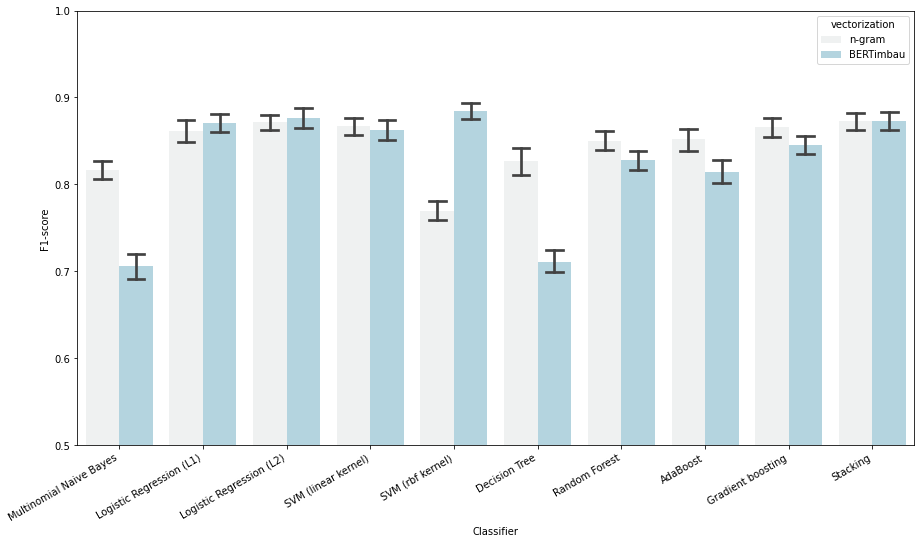

In [7]:
mtr_df = pd.concat([n_gram_df, bert_df])

plt.figure(figsize=(15,8))
sns.barplot(x="clf", y="f1_macro", hue="vectorization", data=mtr_df, estimator=np.mean, ci=95, capsize=.2, color='lightblue')
plt.ylim(0.5, 1)
plt.xlabel("Classifier")
plt.ylabel("F1-score")
plt.xticks(rotation=30, ha='right')
plt.show()